In [1]:
from xmitgcm import open_mdsdataset
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_dir = '/data/SO2/sio-kramosmusalem/04_feb_TSref_output/'
ds = open_mdsdataset(data_dir, iters=[0])

In [3]:
ds

<xarray.Dataset>
Dimensions:  (XC: 448, XG: 448, YC: 512, YG: 512, Z: 100, Zl: 100, Zp1: 101, Zu: 100, time: 1)
Coordinates: (12/37)
    iter     (time) int64 0
  * time     (time) timedelta64[ns] 00:00:00
  * XC       (XC) >f8 239.0 239.0 239.0 239.1 239.1 ... 245.9 246.0 246.0 246.0
  * YC       (YC) >f8 27.01 27.02 27.04 27.05 27.07 ... 34.95 34.96 34.98 34.99
  * XG       (XG) >f8 239.0 239.0 239.0 239.0 239.1 ... 245.9 246.0 246.0 246.0
  * YG       (YG) >f8 27.0 27.02 27.03 27.05 27.06 ... 34.94 34.96 34.97 34.99
    ...       ...
    maskInW  (YC, XG) bool dask.array<chunksize=(512, 448), meta=np.ndarray>
    maskInS  (YG, XC) bool dask.array<chunksize=(512, 448), meta=np.ndarray>
    dxV      (YG, XG) >f8 dask.array<chunksize=(512, 448), meta=np.ndarray>
    maskInC  (YC, XC) bool dask.array<chunksize=(512, 448), meta=np.ndarray>
    dxF      (YC, XC) >f8 dask.array<chunksize=(512, 448), meta=np.ndarray>
    dyF      (YC, XC) >f8 dask.array<chunksize=(512, 448), meta=np.ndarray>
Data variables:
    Eta      (time, YC, XC) >f8 dask.array<chunksize=(1, 512, 448), meta=np.ndarray>
    S        (time, Z, YC, XC) >f8 dask.array<chunksize=(1, 100, 512, 448), meta=np.ndarray>
    U        (time, Z, YC, XG) >f8 dask.array<chunksize=(1, 100, 512, 448), meta=np.ndarray>
    T        (time, Z, YC, XC) >f8 dask.array<chunksize=(1, 100, 512, 448), meta=np.ndarray>
    V        (time, Z, YG, XC) >f8 dask.array<chunksize=(1, 100, 512, 448), meta=np.ndarray>
    W        (time, Zl, YC, XC) >f8 dask.array<chunksize=(1, 100, 512, 448), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    title:        netCDF wrapper of MITgcm MDS binary data
    source:       MITgcm
    history:      Created by calling `open_mdsdataset(grid_dir=None, iters=[0...

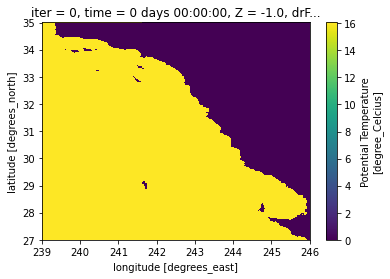

In [4]:
ds.T.isel(Z=0).plot()

<ipython-input-5-ef5fae7d5071>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(ds.XC, ds.YC, ds.T[0,0,:,:])


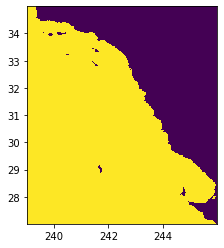

In [5]:
fig, ax = plt.subplots(1,1, figsize=(4,4))
ax.pcolormesh(ds.XC, ds.YC, ds.T[0,0,:,:])
ax.set_aspect(1)

<ipython-input-6-a03b5b25acff>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(ds.XC, ds.Z, ds.T[0,:,70,:])


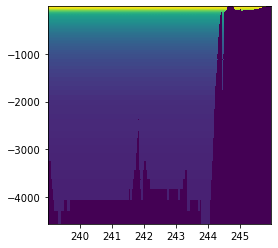

In [6]:
fig, ax = plt.subplots(1,1, figsize=(4,4))
ax.pcolormesh(ds.XC, ds.Z, ds.T[0,:,70,:])


In [7]:
# Volume weighted Salinity avg

volume = ds.hFacC * ds.drF * ds.rA
avg = (ds.T * volume).sum() / volume.sum()
print(avg.data)

dask.array<truediv, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>


In [8]:
ds.S.mean()

<xarray.DataArray 'S' ()>
dask.array<mean_agg-aggregate, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>

In [9]:
avg*5000

<xarray.DataArray ()>
dask.array<mul, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>